# Лабораторная работа 4. Алгоритмы на графах

### Вариант 4

### Задача 1



Найти кратчайший путь на графе между парами вершин методом динамического программирования вручную.

| Вариант | Начальная и конечная вершины| Граф |
|:---|:---|:---|
| 4  | 1, 7 | 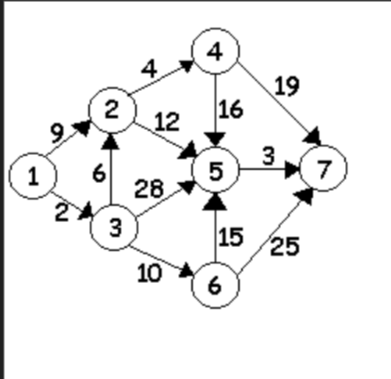 |

Для решения задачи нужно вручную найти кратчайший путь от (1) до (7). 
Для этого вычислим 
- 1 -> 2 -> 4 -> 7 = 32
- 1 -> 2 -> 4 -> 5 -> 7 = 32
- 1 -> 2 -> 5 -> 7 = 24
- 1 -> 3 -> 6 -> 7 = 37
- 1 -> 3 -> 6 -> 5 -> 7 = 30
- 1 -> 3 -> 5 -> 7 = 33
- 1 -> 3 -> 2 -> 5 -> 7 = 23
- 1 -> 3 -> 2 -> 4 -> 7 = 31
- 1 -> 3 -> 2 -> 4 -> 5 -> 7 = 31

Получим что кратчайший путь из (1) в (7) будет равен 23

### Задание 2 

Реализовать прогрммно поиск кратчайшего пути на графе между парами вершин из задания 1 методом динамического программирования.

In [1]:
def floyd_warshall(graph):
    # Копируем граф, чтобы не изменять исходный
    dist = [row[:] for row in graph]

    # Проходим по всем вершинам
    for k in range(len(dist)):
        for i in range(len(dist)):
            for j in range(len(dist)):
                # Если есть более короткий путь от i к j через k
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    # Обновляем расстояние
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

graph = [[0, 9, 2, float('inf'), float('inf'), float('inf'), float('inf')],
         [float('inf'), 0, float('inf'), 4, 12, float('inf'), float('inf')],
         [float('inf'), 6, 0, float('inf'), 28, 10, float('inf')],
         [float('inf'), float('inf'), float('inf'), 0, 16, float('inf'), 19],
         [float('inf'), float('inf'), float('inf'), float('inf'), 0, float('inf'), 3], 
         [float('inf'), float('inf'), float('inf'), float('inf'), 15, 0, 25],
         [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0]]

# Находим кратчайшие расстояния между всеми парами вершин
dist = floyd_warshall(graph)

# Выводим результат
for row in dist:
    print(row)


[0, 8, 2, 12, 20, 12, 23]
[inf, 0, inf, 4, 12, inf, 15]
[inf, 6, 0, 10, 18, 10, 21]
[inf, inf, inf, 0, 16, inf, 19]
[inf, inf, inf, inf, 0, inf, 3]
[inf, inf, inf, inf, 15, 0, 18]
[inf, inf, inf, inf, inf, inf, 0]


### Задание 3

 Реализовать алгоритм Дейкстры поиска кратчайшего пути на графе между парами вершин:

| Вариант | Начальная и конечная вершины| Граф |
|:---|:---|:---|
| 4  | 3, 8 | 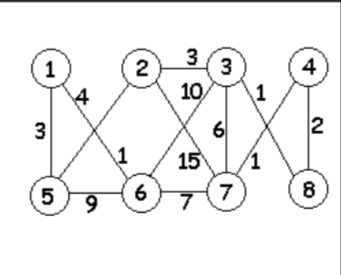

In [2]:
import heapq

def dijkstra(graph, start):

    # Инициализация расстояний до всех вершин графа
    distances = {vertex: float('inf') for vertex in graph}
    distances[start] = 0

    # Создание очереди с приоритетами (heap), которая будет хранить вершины графа в порядке возрастания расстояний до них
    priority_queue = [(0, start)]

    # Инициализация словаря, который будет хранить предыдущие вершины на кратчайших путях до всех остальных вершин графа
    previous = {vertex: None for vertex in graph}

    while priority_queue:
        # Извлечение вершины из очереди с приоритетами, которая имеет минимальное расстояние до начальной вершины
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Если расстояние до текущей вершины уже больше, чем минимальное расстояние из начальной вершины до неё, то пропустить её
        if current_distance > distances[current_vertex]:
            continue

        # Проход по всем соседним вершинам текущей вершины
        for neighbor, weight in graph[current_vertex].items():
            # Расчёт расстояния от начальной вершины до текущей соседней вершины через текущую вершину
            distance = current_distance + weight

            # Если новое расстояние меньше, чем ранее известное расстояние до этой соседней вершины, то обновить расстояние и предыдущую вершину на пути до неё
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_vertex

                # Добавить соседнюю вершину в очередь с приоритетами с новым расстоянием до неё
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

graph = {
    '1': {'6': 1, '5': 3},
    '2': {'5': 4, '3': 3, '7': 15},
    '3': {'2': 3, '7': 6, '8': 1, '6': 10},
    '4': {'7': 1, '8': 2},
    '5': {'1': 3, '2': 4, '6': 9},
    '6': {'5': 9, '1': 1, '3': 10, '7': 7},
    '7': {'6': 7, '2': 15, '3': 6, '4': 1},
    '8': {'4': 2, '3': 1}
}

dijkstra(graph, '3')

{'1': 10, '2': 3, '3': 0, '4': 3, '5': 7, '6': 10, '7': 4, '8': 1}

### Задание 4

Реализовать прогрммно один из алгоритмов поиска кратчайшего пути на графе между парами вершин из задания 3.

Для этого воспользуемся алгоритмом Флойда—Уоршелла

Алгоритм Флойда—Уоршелла () - алгоритм поиска кратчайших путей во взвешенном графе с положительным или отрицательным весом ребер (но без отрицательных циклов). За одно выполнение алгоритма будут найдены длины (суммарные веса) кратчайших путей между всеми парами вершин.

In [4]:
def floyd_warshall(graph):
    dist = [row[:] for row in graph]
    for k in range(len(dist)):
        for i in range(len(dist)):
            for j in range(len(dist)):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

graph = [[0, float('inf'), float('inf'), float('inf'), 3, 1, float('inf'), float('inf')],
         [float('inf'), 0, 3, float('inf'), 4, float('inf'), 15, float('inf')],
         [float('inf'), 3, 0, float('inf'), float('inf'), 10, 6, 1],
         [float('inf'), float('inf'), float('inf'), 0, float('inf'), float('inf'), 1, 2],
         [3, 4, float('inf'), float('inf'), 0, 9, float('inf'),float('inf')], 
         [1, float('inf'), 10, float('inf'), 9, 0, 7, float('inf')],
         [float('inf'), 15, 6, 1, float('inf'), 7, 0, float('inf')],
         [float('inf'), float('inf'), 1, 2, float('inf'), float('inf'), float('inf'), 0]]
# Находим кратчайшие расстояния между всеми парами вершин
dist = floyd_warshall(graph)
# Выводим результат
for row in dist:
    print(row)


[0, 7, 10, 9, 3, 1, 8, 11]
[7, 0, 3, 6, 4, 8, 7, 4]
[10, 3, 0, 3, 7, 10, 4, 1]
[9, 6, 3, 0, 10, 8, 1, 2]
[3, 4, 7, 10, 0, 4, 11, 8]
[1, 8, 10, 8, 4, 0, 7, 10]
[8, 7, 4, 1, 11, 7, 0, 3]
[11, 4, 1, 2, 8, 10, 3, 0]


Ответ: [10, 3, 0, 3, 7, 10, 4, 1]